# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_4:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

c:\users\purnima\appdata\local\programs\python\python36\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('C:/Users/PURNIMA/Documents/AI/Donors choose/train_data.csv')
resource_data = pd.read_csv('C:/Users/PURNIMA/Documents/AI/Donors choose/resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
print("Number of data points in resource data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in resource data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

# 1.2 Data Analysis

Number of projects approved: 92706 (84.85830404217926%)
Number of projects not approved: 16542 (15.141695957820739%)


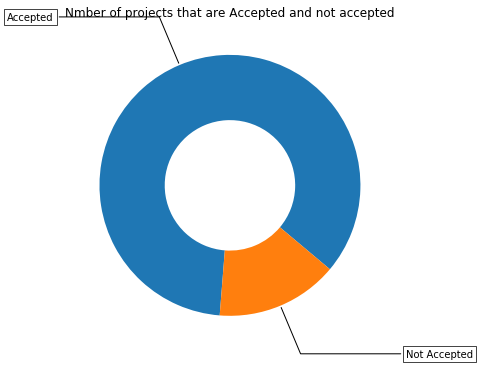

In [5]:
# PROVIDE CITATIONS TO YOUR CODE IF YOU TAKE IT FROM ANOTHER WEBSITE.
# https://matplotlib.org/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py


approval_count = project_data['project_is_approved'].value_counts()
print('Number of projects approved: {} ({}%)'.format(approval_count[1],approval_count[1]*100/sum(approval_count)))
print('Number of projects not approved: {} ({}%)'.format(approval_count[0],approval_count[0]*100/sum(approval_count)))
fig, ax = plt.subplots(figsize = (6,6), subplot_kw=dict(aspect = 'equal'))
recipe = ['Accepted', 'Not Accepted']

data = [approval_count[1],approval_count[0]]

wedges, texts = ax.pie(data, wedgeprops = dict(width = 0.5), startangle = -40)

bbox_props = dict(boxstyle= 'square,pad=0.3',fc= 'w',ec= 'k',lw = 0.72)
kw = dict(xycoords = 'data', textcoords = 'data',arrowprops = dict(arrowstyle = '-'),
         bbox = bbox_props, zorder = 0, va = 'center')

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

ax.set_title("Nmber of projects that are Accepted and not accepted");

### 1.2.1 Univariate Analysis: School State

In [6]:
# Pandas dataframe groupby count, mean: https://stackoverflow.com/a/19385591/4084039

temp = pd.DataFrame(project_data.groupby("school_state")["project_is_approved"].apply(np.mean)).reset_index()
# if you have data which contain only 0 and 1, then the mean = percentage (think about it)
temp.columns = ['state_code', 'num_proposals']

'''# How to plot US state heatmap: https://datascience.stackexchange.com/a/9620

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = temp['state_code'],
        z = temp['num_proposals'].astype(float),
        locationmode = 'USA-states',
        text = temp['state_code'],
        marker = dict(line = dict (color = 'rgb(255,255,255)',width = 2)),
        colorbar = dict(title = "% of pro")
    ) ]

layout = dict(
        title = 'Project Proposals % of Acceptance Rate by US States',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='us-map-heat-map')
'''

'# How to plot US state heatmap: https://datascience.stackexchange.com/a/9620\n\nscl = [[0.0, \'rgb(242,240,247)\'],[0.2, \'rgb(218,218,235)\'],[0.4, \'rgb(188,189,220)\'],            [0.6, \'rgb(158,154,200)\'],[0.8, \'rgb(117,107,177)\'],[1.0, \'rgb(84,39,143)\']]\n\ndata = [ dict(\n        type=\'choropleth\',\n        colorscale = scl,\n        autocolorscale = False,\n        locations = temp[\'state_code\'],\n        z = temp[\'num_proposals\'].astype(float),\n        locationmode = \'USA-states\',\n        text = temp[\'state_code\'],\n        marker = dict(line = dict (color = \'rgb(255,255,255)\',width = 2)),\n        colorbar = dict(title = "% of pro")\n    ) ]\n\nlayout = dict(\n        title = \'Project Proposals % of Acceptance Rate by US States\',\n        geo = dict(\n            scope=\'usa\',\n            projection=dict( type=\'albers usa\' ),\n            showlakes = True,\n            lakecolor = \'rgb(255, 255, 255)\',\n        ),\n    )\n\nfig = go.Figure(data=dat

In [7]:
# https://www.csi.cuny.edu/sites/default/files/pdf/administration/ops/2letterstabbrev.pdf
temp.sort_values(by = 'num_proposals',ascending=False,inplace = True)
print('5 US states with highest % of approval\n',temp.head())
print('---'*15)
print('5 US states with lowest % of approval \n',temp.tail())

5 US states with highest % of approval
    state_code  num_proposals
8          DE       0.897959
28         ND       0.888112
47         WA       0.876178
35         OH       0.875152
30         NH       0.873563
---------------------------------------------
5 US states with lowest % of approval 
    state_code  num_proposals
18         LA       0.831245
26         MT       0.816327
43         TX       0.813142
7          DC       0.802326
46         VT       0.800000


>By sorting the US states based on precentage of project approval, we see that state **Vermont(VT)** has least percentage of project approval. And state **Delaware(DE)** has highest % of project approval. 
1. Also one more observation to be noted down, whether the state is small or large all US state has project approval rate greater than or equal to 80%.
2. Percentage(%) of projects got approval for each of the US states lies in the range [0.80 - 0.89].

In [8]:
#stacked bar plots matplotlib: https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
def stack_plot(data, xticks, col2 = 'project_is_approved', col3 = 'total'):
    ind = np.arange(data.shape[0])
    plt.figure(figsize = (20,5))
    
    p1 = plt.bar(ind, data[col3].values)
    p2 = plt.bar(ind, data[col2].values)
    font = {'size': 20, 'color':'darkred'}
    plt.ylabel('No. of Projects',fontdict=font)
    plt.xlabel('{}'.format(xticks),fontdict=font) #https://matplotlib.org/examples/text_labels_and_annotations/text_demo_fontdict.html
    plt.title('Number of projects approved vs rejected wrt {}'.format(xticks))
    plt.xticks(ind,data[xticks].values,fontsize = 15, rotation = 90) #using shift+tab documentation opens for any function.
    plt.legend((p1[0],p2[0]),('total','accepted'))
    plt.show()

In [9]:
def univariate_barplots(data, col1, col2='project_is_approved', top=False):
    # Count number of zeros in dataframe python: https://stackoverflow.com/a/51540521/4084039
    temp = pd.DataFrame(project_data.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()

    # Pandas dataframe grouby count: https://stackoverflow.com/a/19385591/4084039
    temp['total'] = pd.DataFrame(project_data.groupby(col1)[col2].agg({'total':'count'})).reset_index()['total']
    temp['Avg'] = pd.DataFrame(project_data.groupby(col1)[col2].agg({'Avg':'mean'})).reset_index()['Avg']
    
    temp.sort_values(by=['total'],inplace=True, ascending=False)
    
    if top:
        temp = temp[0:top]
    
    stack_plot(temp, col1, col2, col3='total')
    print(temp.head(5))
    print("="*50)
    print(temp.tail(5))

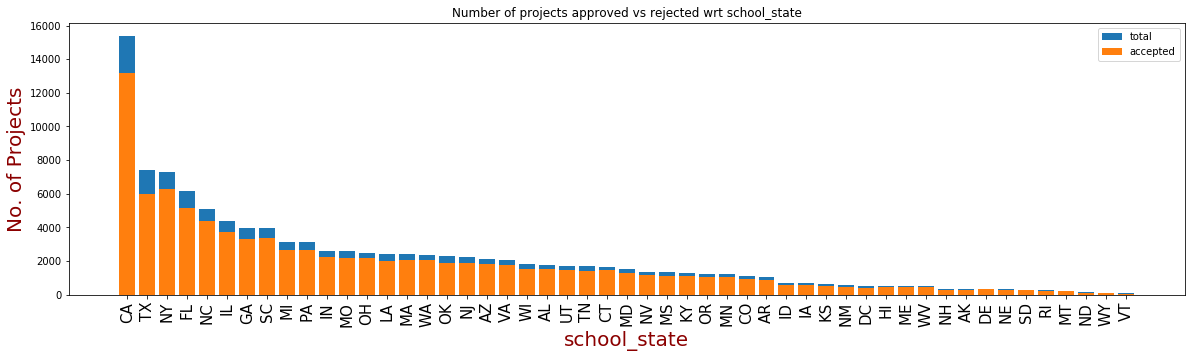

   school_state  project_is_approved  total       Avg
4            CA                13205  15388  0.858136
43           TX                 6014   7396  0.813142
34           NY                 6291   7318  0.859661
9            FL                 5144   6185  0.831690
27           NC                 4353   5091  0.855038
   school_state  project_is_approved  total       Avg
39           RI                  243    285  0.852632
26           MT                  200    245  0.816327
28           ND                  127    143  0.888112
50           WY                   82     98  0.836735
46           VT                   64     80  0.800000


In [10]:
univariate_barplots(project_data, 'school_state')

**Summary**: 
1. Every state has greater than 80% success rate in approval.
2. VT(Vermont) has submitted least number of proposal i.e 80 proposal. So it might be one of the reason that it has lowest proposal approval rate.
3. Delaware(DE) has highest proposal approval rate i.e 89% but it has only submitted 343 proposal. Also California(CA) has submitted highest number of proposals but it approval rate is only 85%. So we cannot assume that proposal approval rate is proportional to number of proposal submitted by each state because there other factors also which matters.

### 1.2.2 Univariate Analysis: teacher_prefix

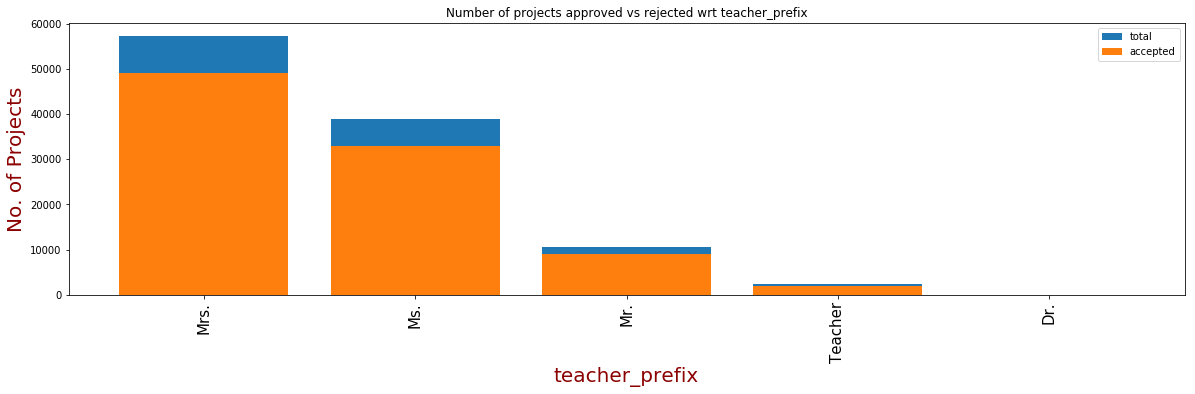

  teacher_prefix  project_is_approved  total       Avg
2           Mrs.                48997  57269  0.855559
3            Ms.                32860  38955  0.843537
1            Mr.                 8960  10648  0.841473
4        Teacher                 1877   2360  0.795339
0            Dr.                    9     13  0.692308
  teacher_prefix  project_is_approved  total       Avg
2           Mrs.                48997  57269  0.855559
3            Ms.                32860  38955  0.843537
1            Mr.                 8960  10648  0.841473
4        Teacher                 1877   2360  0.795339
0            Dr.                    9     13  0.692308


In [11]:
univariate_barplots(project_data, 'teacher_prefix')

**1. Project submitted by teacher who has prefix Mrs. and Ms. have highest number of project submission as well as highest number of project acceptance rate.
<br>2. It seems like female teachers are trusted more by people.**

### 1.2.3 Univariate Analysis: project_grade_category

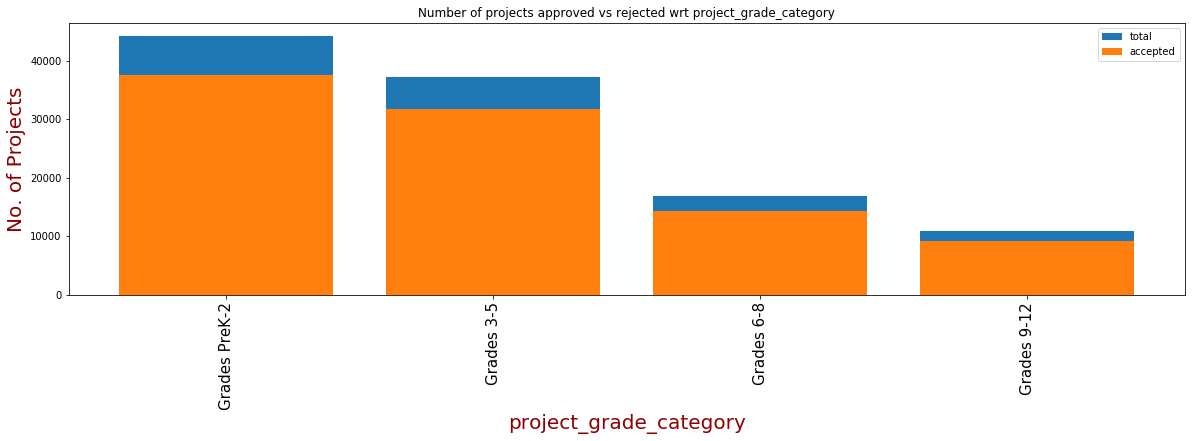

  project_grade_category  project_is_approved  total       Avg
3          Grades PreK-2                37536  44225  0.848751
0             Grades 3-5                31729  37137  0.854377
1             Grades 6-8                14258  16923  0.842522
2            Grades 9-12                 9183  10963  0.837636
  project_grade_category  project_is_approved  total       Avg
3          Grades PreK-2                37536  44225  0.848751
0             Grades 3-5                31729  37137  0.854377
1             Grades 6-8                14258  16923  0.842522
2            Grades 9-12                 9183  10963  0.837636


In [12]:
univariate_barplots(project_data, 'project_grade_category')

>**1. Grade preK-2 has highest number of project submission. But its project acceptance rate is slightly less than Grades 3-5 which has project acceptance rate of 85.43%.**<br>
**2. Grades 3-5 have highest acceptance rate.**<br>
**3. One main point that can be noted here, all four grade category has acceptance rate more than 83% but less than 86%.**


### 1.2.4 Univariate Analysis: project_subject_categories

In [13]:
catogories = project_data['project_subject_categories'].values
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in tqdm(catogories):
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())


100%|██████████████████████████████████████████████████████████████████████| 109248/109248 [00:00<00:00, 292119.74it/s]


In [14]:
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

      project_subject_subcategories  \
0                     ESL, Literacy   
1  Civics & Government, Team Sports   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories  
0             Literacy_Language  
1  History_Civics Health_Sports

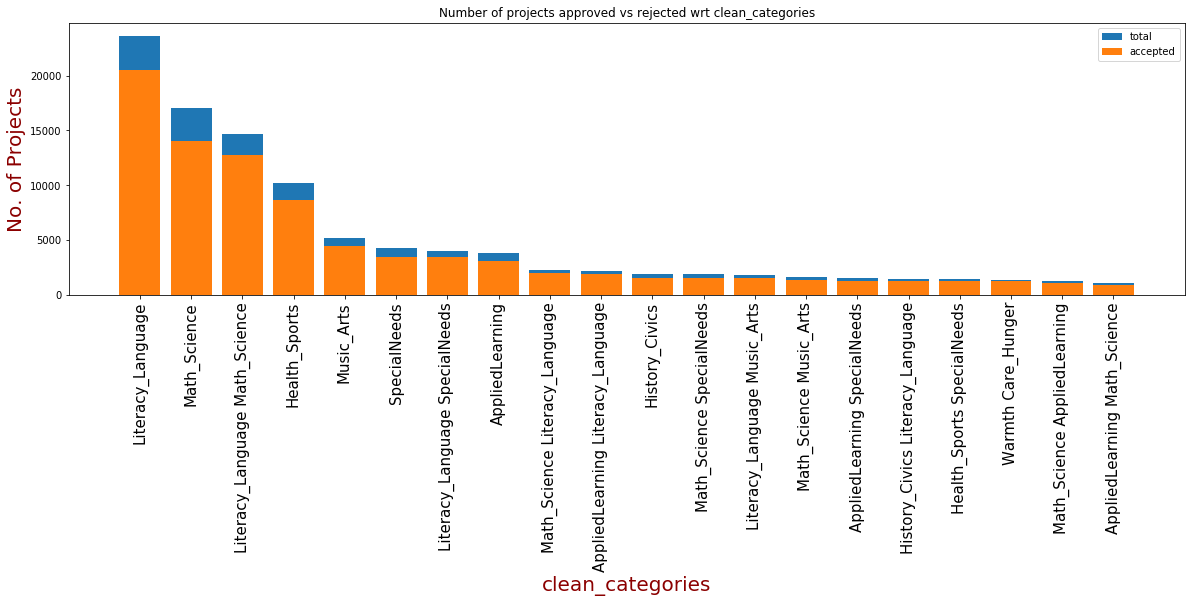

                  clean_categories  project_is_approved  total       Avg
24               Literacy_Language                20520  23655  0.867470
32                    Math_Science                13991  17072  0.819529
28  Literacy_Language Math_Science                12725  14636  0.869432
8                    Health_Sports                 8640  10177  0.848973
40                      Music_Arts                 4429   5180  0.855019
                    clean_categories  project_is_approved  total       Avg
19  History_Civics Literacy_Language                 1271   1421  0.894441
14        Health_Sports SpecialNeeds                 1215   1391  0.873472
50                Warmth Care_Hunger                 1212   1309  0.925898
33      Math_Science AppliedLearning                 1019   1220  0.835246
4       AppliedLearning Math_Science                  855   1052  0.812738


In [15]:
univariate_barplots(project_data, 'clean_categories',top = 20)

>Literacy_Language and Math_Science are top two categories which has highest number of projects submission.<br>
**Since 1st highest number of project submitted in Literacy_Language, but only 86% were accepted, there are other categories like Warmth Care_Hunger which has less number of project submitted but have acceptance rate greater than Literacy_Languge.**

In [16]:
a = pd.DataFrame(project_data.pivot_table(index='clean_categories', values = 'project_is_approved',aggfunc=['mean','count']))
a.columns = ['mean','count']
a.sort_values(by = 'mean', inplace = True)
print(a.head())
print(a.tail())

                                       mean  count
clean_categories                                  
History_Civics Warmth Care_Hunger  0.000000      1
Music_Arts Warmth Care_Hunger      0.500000      2
Math_Science Warmth Care_Hunger    0.545455     11
Music_Arts Health_Sports           0.684211     19
Music_Arts AppliedLearning         0.700000     10
                                      mean  count
clean_categories                                 
Health_Sports History_Civics      0.883721     43
History_Civics Literacy_Language  0.894441   1421
History_Civics Health_Sports      0.923077     13
Warmth Care_Hunger                0.925898   1309
Health_Sports Warmth Care_Hunger  0.956522     23


**Project Acceptance rate wrt project_subject_categories is in range from lowest 0% to maximum 95.65%.**

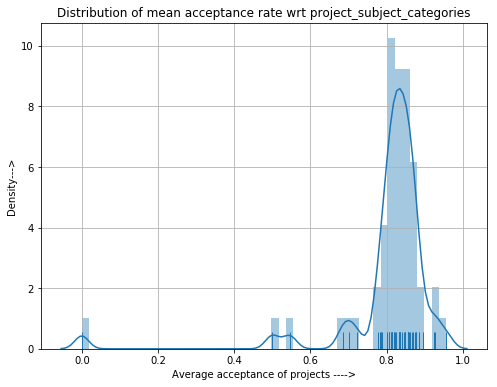

In [17]:
#https://seaborn.pydata.org/generated/seaborn.distplot.html
#if rug = Draw small vertical lines to show each observation in a distribution.
plt.figure(figsize=(8,6))
sns.distplot(a['mean'],rug=True,bins = 50)
plt.grid()
plt.title('Distribution of mean acceptance rate wrt project_subject_categories')
plt.xlabel('Average acceptance of projects ---->')
plt.ylabel('Density--->');

**Above density plot is more dense in the range from 0.8 to 0.9, this implies that most of the subject categories have average project acceptance rate from 80 to 90 percent.**

In [18]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter #Counter is a container in collection module 
my_counter1 = Counter()          #https://www.geeksforgeeks.org/counters-in-python-set-1/
for word in project_data['clean_categories'].values:
    my_counter1.update(word.split())

#Counting unique categories only for project approved.
my_counter2 = Counter()
cat_in_project_approval = project_data.loc[project_data.project_is_approved == 1,'clean_categories']
for word in cat_in_project_approval.values:
    my_counter2.update(word.split())

my_counter1 = dict(my_counter1)
my_counter2 = dict(my_counter2)

In [19]:
print(my_counter1)
print('--'*60)
print(my_counter2)

{'Literacy_Language': 52239, 'History_Civics': 5914, 'Health_Sports': 14223, 'Math_Science': 41421, 'SpecialNeeds': 13642, 'AppliedLearning': 12135, 'Music_Arts': 10293, 'Warmth': 1388, 'Care_Hunger': 1388}
------------------------------------------------------------------------------------------------------------------------
{'History_Civics': 5067, 'Health_Sports': 12048, 'Literacy_Language': 45233, 'Math_Science': 34844, 'SpecialNeeds': 11390, 'AppliedLearning': 10042, 'Music_Arts': 8674, 'Warmth': 1274, 'Care_Hunger': 1274}


In [20]:
#Dividing values of dictionaries by values of another dictionary python
# https://stackoverflow.com/a/11840128/8107740
my_counter3 = {k: my_counter2[k]/my_counter1[k] for k in my_counter1.keys()}
print(my_counter3) #this give the proportion of project approved in each unique categories

{'Literacy_Language': 0.8658856409961906, 'History_Civics': 0.8567805207981062, 'Health_Sports': 0.8470786753849399, 'Math_Science': 0.8412158084063639, 'SpecialNeeds': 0.8349215657528222, 'AppliedLearning': 0.8275236918005768, 'Music_Arts': 0.8427086369377247, 'Warmth': 0.9178674351585014, 'Care_Hunger': 0.9178674351585014}


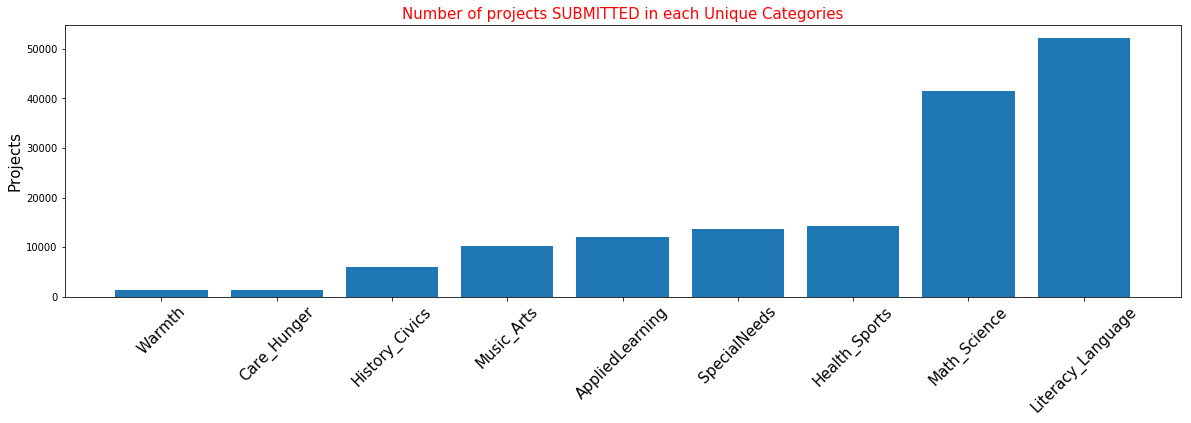

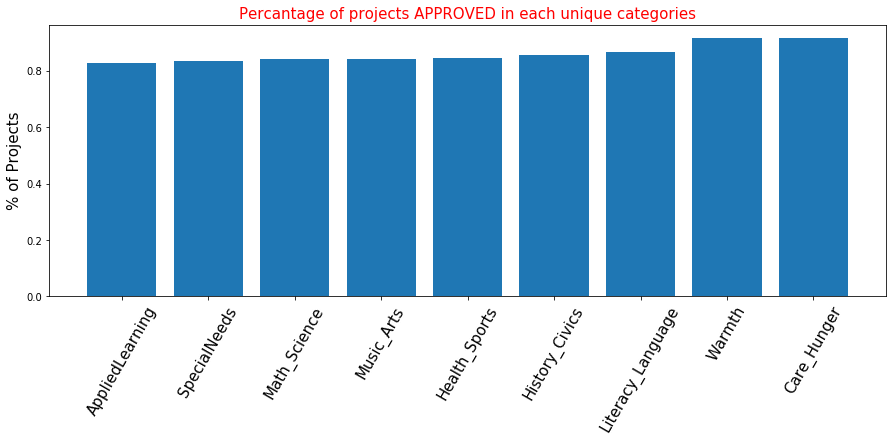

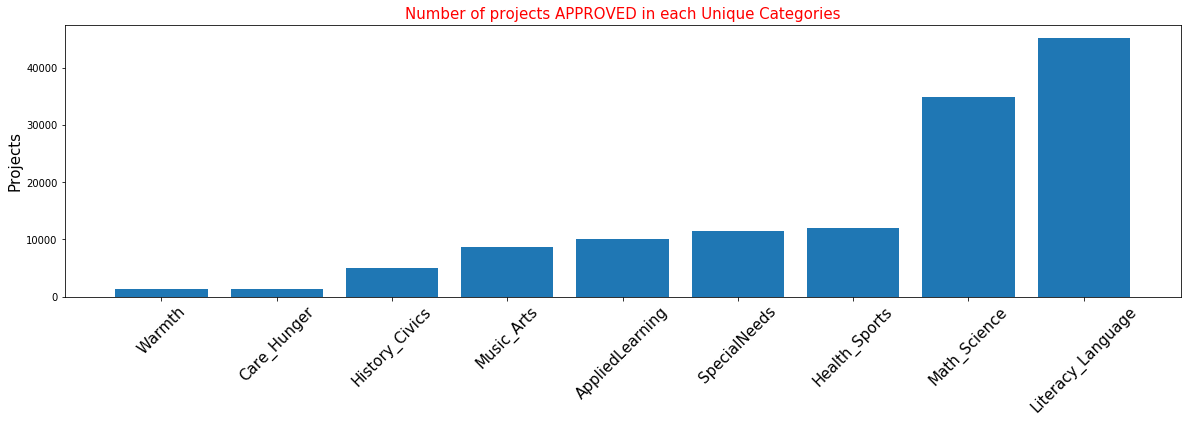

In [21]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
sorted_cat_dict = dict(sorted(my_counter1.items(), key = lambda x: x[1]))
sorted_cat_dict1 = dict(sorted(my_counter3.items(),key = lambda x: x[1]))
sorted_cat_dict2 = dict(sorted(my_counter2.items(), key= lambda x: x[1]))
ind = np.arange(len(sorted_cat_dict))
ind1 = np.arange(len(sorted_cat_dict1))
plt.figure(figsize=(20,5))
plt.bar(ind, list(sorted_cat_dict.values()))
plt.ylabel('Projects',fontsize = 15)
plt.title('Number of projects SUBMITTED in each Unique Categories',fontsize = 15,color = 'red')
plt.xticks(ind,list(sorted_cat_dict.keys()),fontsize = 15, rotation = 45)

plt.figure(figsize = (15,5))
plt.bar(ind1, list(sorted_cat_dict1.values()))
plt.xticks(ind1, list(sorted_cat_dict1.keys()), fontsize = 15,rotation = 60)
plt.ylabel('% of Projects',fontsize = 15)
plt.title('Percantage of projects APPROVED in each unique categories',fontsize = 15, color= 'red')

plt.figure(figsize=(20,5))
plt.bar(ind, list(sorted_cat_dict2.values()))
plt.ylabel('Projects',fontsize = 15)
plt.title('Number of projects APPROVED in each Unique Categories',fontsize = 15,color = 'red')
plt.xticks(ind,list(sorted_cat_dict.keys()),fontsize = 15, rotation = 45)

plt.show()

**1. From 1st plot, among all 9 unique categories maximum number of project submitted is in Literacy_Language category.<br><br>2. From 2nd plot, category *Warmth and Care_Hunger* has highest approval rate(91.78%) among other categories also these same two categories have the least number of projects submitted.<br><br>3. From last plot it is clear that number of project approval in each unique category follows the same order as shown in number of projected submitted plot. Hence we can say that number of project approval is proportional to the number of projects submitted.**

In [22]:
print('Number of projects submitted in each unique')
for i,j in sorted_cat_dict.items():
    print('{:20}:{:10}'.format(i,j))

Number of projects submitted in each unique
Warmth              :      1388
Care_Hunger         :      1388
History_Civics      :      5914
Music_Arts          :     10293
AppliedLearning     :     12135
SpecialNeeds        :     13642
Health_Sports       :     14223
Math_Science        :     41421
Literacy_Language   :     52239


In [23]:
print('Number of projects approved in each unique category')
for i,j in sorted_cat_dict2.items():
    print('{:20}:{:10}'.format(i,j))

Number of projects approved in each unique category
Warmth              :      1274
Care_Hunger         :      1274
History_Civics      :      5067
Music_Arts          :      8674
AppliedLearning     :     10042
SpecialNeeds        :     11390
Health_Sports       :     12048
Math_Science        :     34844
Literacy_Language   :     45233


### 1.2.5 Univariate Analysis: project_subject_subcategories

In [24]:
sub_catogories = project_data['project_subject_subcategories'].values
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in tqdm(sub_catogories):
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

100%|██████████████████████████████████████████████████████████████████████| 109248/109248 [00:00<00:00, 215804.25it/s]


In [25]:
project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  
0             Literacy_Language                  ESL Literacy  
1  History_Civics Health_Sports  Civics_Government TeamSports

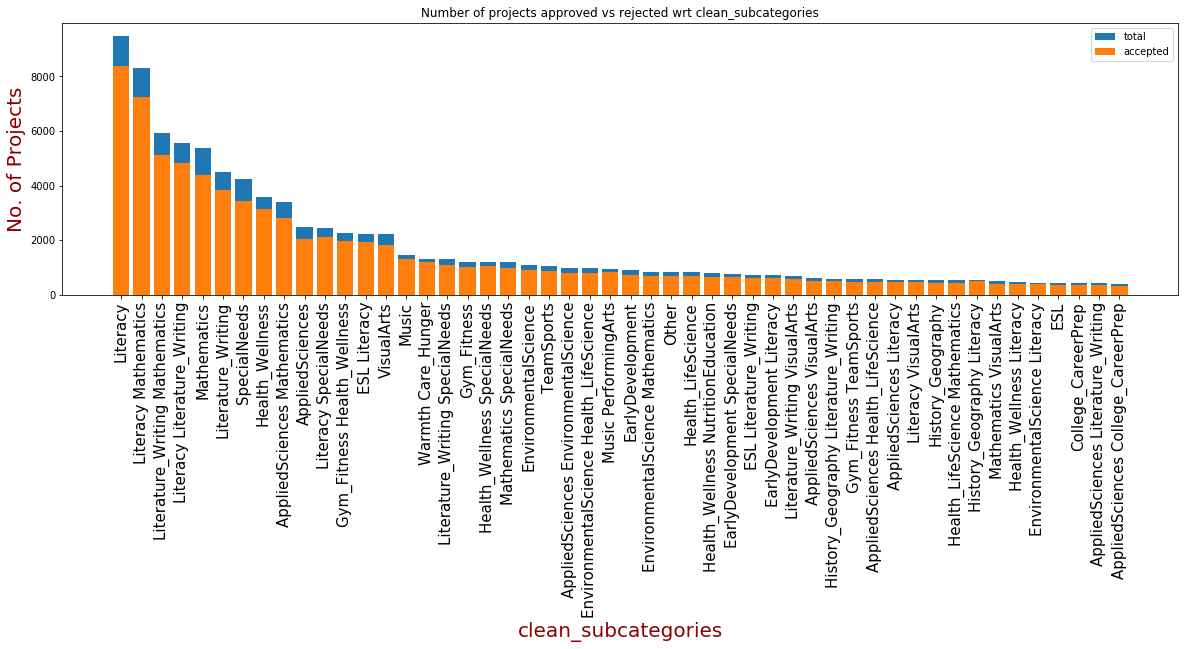

                clean_subcategories  project_is_approved  total       Avg
317                        Literacy                 8371   9486  0.882458
319            Literacy Mathematics                 7260   8325  0.872072
331  Literature_Writing Mathematics                 5140   5923  0.867803
318     Literacy Literature_Writing                 4823   5571  0.865733
342                     Mathematics                 4385   5379  0.815207
                    clean_subcategories  project_is_approved  total       Avg
196       EnvironmentalScience Literacy                  389    444  0.876126
127                                 ESL                  349    421  0.828979
79                   College_CareerPrep                  343    421  0.814727
17   AppliedSciences Literature_Writing                  361    420  0.859524
3    AppliedSciences College_CareerPrep                  330    405  0.814815


In [26]:
univariate_barplots(project_data, 'clean_subcategories', top = 50)

**By looking at top five sub categories with respect to total project proposal submission, Literacy, Mathematics and Literature_Writing are only subcategories occures in them.**

In [27]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
counter_sub1 = Counter()          #https://www.geeksforgeeks.org/counters-in-python-set-1/
for word in project_data['clean_subcategories'].values:
    counter_sub1.update(word.split())

#Counting unique subcategories for project approved.
counter_sub2 = Counter()
subcat_in_project_approval = project_data.loc[project_data.project_is_approved == 1,'clean_subcategories']
for word in subcat_in_project_approval.values:
    counter_sub2.update(word.split())

counter_sub1 = dict(counter_sub1)
counter_sub2 = dict(counter_sub2)

In [28]:
#Dividing values of dictionaries by values of another dictionary python
# https://stackoverflow.com/a/11840128/8107740
counter_sub3 = {k: counter_sub2[k]/counter_sub1[k] for k in counter_sub1.keys()}
print(counter_sub3) #this give the proportion of project approved in each unique sub categories

{'ESL': 0.8520723608884818, 'Literacy': 0.8730563798219585, 'Civics_Government': 0.8478527607361963, 'TeamSports': 0.7915145985401459, 'Health_Wellness': 0.8627125268712136, 'Mathematics': 0.8470114696872552, 'Literature_Writing': 0.8587853374814013, 'SpecialNeeds': 0.8349215657528222, 'ParentInvolvement': 0.8567208271787297, 'EnvironmentalScience': 0.8209622607762476, 'Health_LifeScience': 0.8266824085005903, 'AppliedSciences': 0.8272004437869822, 'EarlyDevelopment': 0.8255759285378468, 'Music': 0.8817170111287759, 'ForeignLanguages': 0.8089887640449438, 'Other': 0.825885328836425, 'Economics': 0.8401486988847584, 'FinancialLiteracy': 0.8450704225352113, 'Gym_Fitness': 0.8449767132401863, 'VisualArts': 0.8214399490283529, 'Warmth': 0.9178674351585014, 'Care_Hunger': 0.9178674351585014, 'SocialSciences': 0.8630208333333333, 'College_CareerPrep': 0.8360591900311527, 'CharacterEducation': 0.8062953995157385, 'PerformingArts': 0.8628250892401835, 'CommunityService': 0.7777777777777778, 'H

In [29]:
print(counter_sub1)
print('----'*10)
print(counter_sub2)

{'ESL': 4367, 'Literacy': 33700, 'Civics_Government': 815, 'TeamSports': 2192, 'Health_Wellness': 10234, 'Mathematics': 28074, 'Literature_Writing': 22179, 'SpecialNeeds': 13642, 'ParentInvolvement': 677, 'EnvironmentalScience': 5591, 'Health_LifeScience': 4235, 'AppliedSciences': 10816, 'EarlyDevelopment': 4254, 'Music': 3145, 'ForeignLanguages': 890, 'Other': 2372, 'Economics': 269, 'FinancialLiteracy': 568, 'Gym_Fitness': 4509, 'VisualArts': 6278, 'Warmth': 1388, 'Care_Hunger': 1388, 'SocialSciences': 1920, 'College_CareerPrep': 2568, 'CharacterEducation': 2065, 'PerformingArts': 1961, 'CommunityService': 441, 'History_Geography': 3171, 'NutritionEducation': 1355, 'Extracurricular': 810}
----------------------------------------
{'Civics_Government': 691, 'TeamSports': 1735, 'Literacy': 29422, 'Mathematics': 23779, 'Literature_Writing': 19047, 'SpecialNeeds': 11390, 'Health_Wellness': 8829, 'ParentInvolvement': 580, 'AppliedSciences': 8947, 'EarlyDevelopment': 3512, 'Health_LifeScien

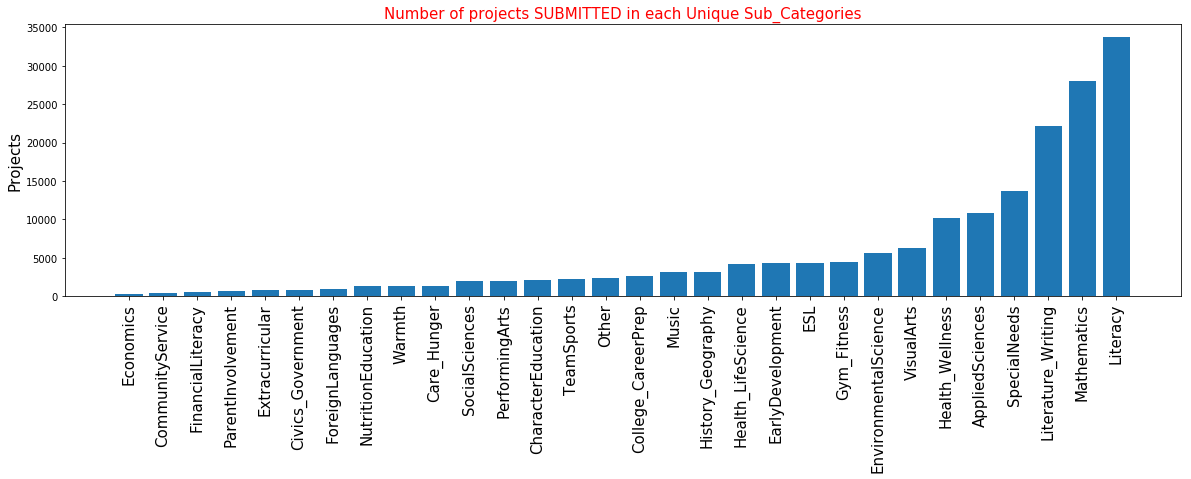

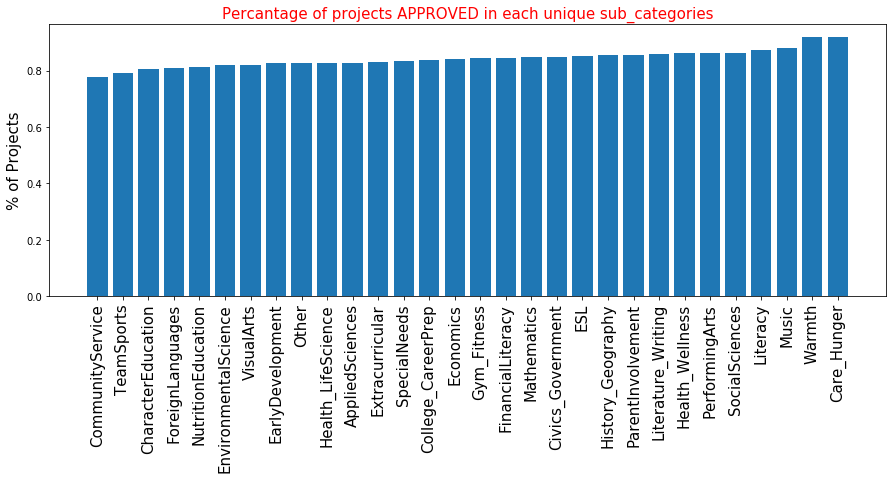

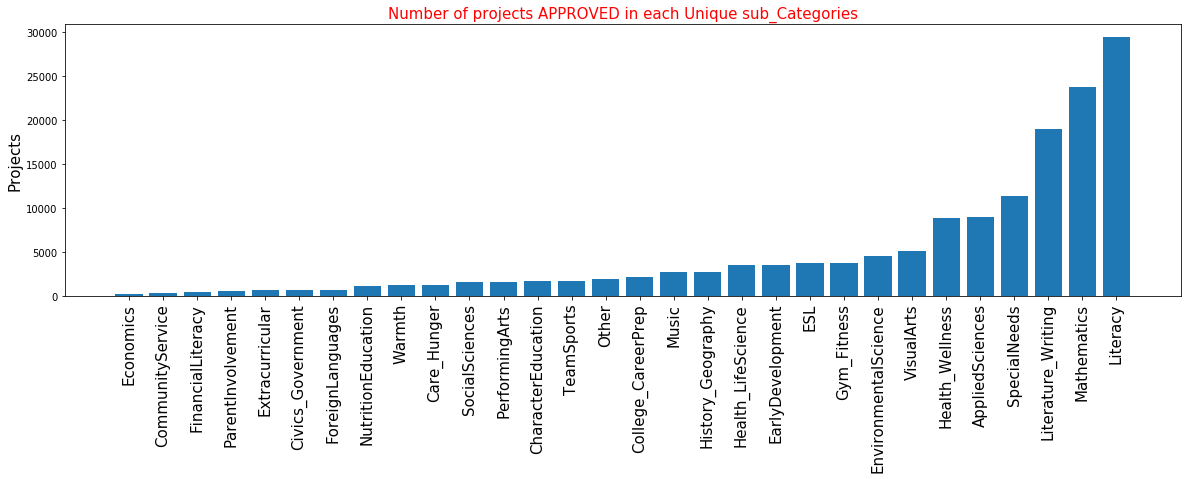

In [30]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
sorted_sub_cat_dict = dict(sorted(counter_sub1.items(), key = lambda x: x[1]))
sorted_sub_cat_dict1 = dict(sorted(counter_sub3.items(),key = lambda x: x[1]))
sorted_sub_cat_dict2 = dict(sorted(counter_sub2.items(), key= lambda x: x[1]))
ind = np.arange(len(sorted_sub_cat_dict))
ind1 = np.arange(len(sorted_sub_cat_dict1))
plt.figure(figsize=(20,5))
plt.bar(ind, list(sorted_sub_cat_dict.values()))
plt.ylabel('Projects',fontsize = 15)
plt.title('Number of projects SUBMITTED in each Unique Sub_Categories',fontsize = 15,color = 'red')
plt.xticks(ind,list(sorted_sub_cat_dict.keys()),fontsize = 15, rotation = 90)

plt.figure(figsize = (15,5))
plt.bar(ind1, list(sorted_sub_cat_dict1.values()))
plt.xticks(ind1, list(sorted_sub_cat_dict1.keys()), fontsize = 15,rotation = 90)
plt.ylabel('% of Projects',fontsize = 15)
plt.title('Percantage of projects APPROVED in each unique sub_categories',fontsize = 15, color= 'red')

plt.figure(figsize=(20,5))
plt.bar(ind, list(sorted_sub_cat_dict2.values()))
plt.ylabel('Projects',fontsize = 15)
plt.title('Number of projects APPROVED in each Unique sub_Categories',fontsize = 15,color = 'red')
plt.xticks(ind,list(sorted_sub_cat_dict.keys()),fontsize = 15, rotation = 90)

plt.show()

**1. Among all unique subject sub_categories maximum number of project submitted is in Literacy.<br><br>2. Category Warmth and Care_Hunger has highest approval rate among other sub categories, it looks like people are more bend towards these categories.<br><br>3. From last plot it is clear that number of project approval follows the same order as shown in number of projected submitted plot. Hence we can say that number of project approval is proportional to the number of projects submitted in subject sub_categories.**

In [31]:
for i, j in sorted_sub_cat_dict.items():
    print("{:20} :{:10}".format(i,j))

Economics            :       269
CommunityService     :       441
FinancialLiteracy    :       568
ParentInvolvement    :       677
Extracurricular      :       810
Civics_Government    :       815
ForeignLanguages     :       890
NutritionEducation   :      1355
Warmth               :      1388
Care_Hunger          :      1388
SocialSciences       :      1920
PerformingArts       :      1961
CharacterEducation   :      2065
TeamSports           :      2192
Other                :      2372
College_CareerPrep   :      2568
Music                :      3145
History_Geography    :      3171
Health_LifeScience   :      4235
EarlyDevelopment     :      4254
ESL                  :      4367
Gym_Fitness          :      4509
EnvironmentalScience :      5591
VisualArts           :      6278
Health_Wellness      :     10234
AppliedSciences      :     10816
SpecialNeeds         :     13642
Literature_Writing   :     22179
Mathematics          :     28074
Literacy             :     33700


### 1.2.6 Univariate Analysis: Text features (Title)

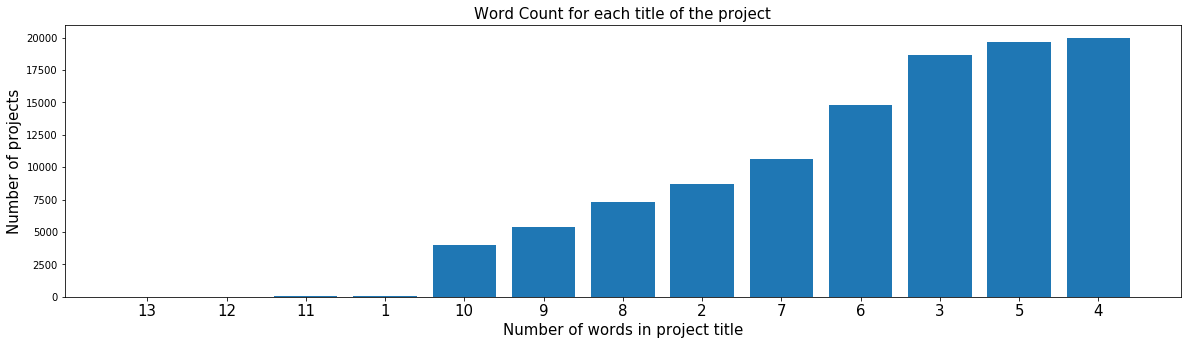

In [32]:
#How to calculate number of words in a string in DataFrame: https://stackoverflow.com/a/37483537/4084039
word_count = project_data['project_title'].str.split().apply(len).value_counts()
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(),key = lambda x:x[1]))

ind = np.arange(len(word_dict))
plt.figure(figsize=(20,5))
plt.bar(ind,list(word_dict.values()))

plt.xticks(ind, list(word_dict.keys()),fontsize = 15)
plt.ylabel('Number of projects',fontsize = 15)
plt.xlabel('Number of words in project title',fontsize = 15)
plt.title('Word Count for each title of the project',fontsize = 15)
plt.show()

**Most projects submitted had project title containing 3,4 or 5 words.**

In [33]:
approved_title_word_count = project_data[project_data['project_is_approved']==1]['project_title'].str.split().apply(len)
approved_title_word_count = approved_title_word_count.values

rejected_title_word_count = project_data[project_data['project_is_approved']==0]['project_title'].str.split().apply(len)
rejected_title_word_count = rejected_title_word_count.values

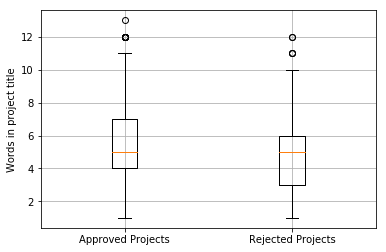

In [34]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_title_word_count, rejected_title_word_count])
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project title')
plt.grid()
plt.show()

1. **The distribution of no. of words in approved projects is slightly above the distribution of no. of words in rejected projects.**
2. IQR(Inter Quartile Range) of no. words in project title for approved project is (Q3 - Q1= 7-4) 3. Also IQR range is from 4 to 7.
3. IQR(Inter Quartile Range) of no. words in project title for approved project is (Q3 - Q1= 6-3) 3. Also IQR range is from 3 to 6.
4. Both boxplots have same IQR.


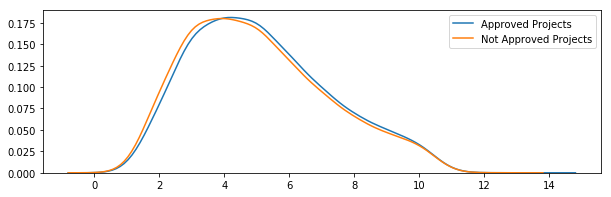

In [35]:
plt.figure(figsize=(10,3))
sns.kdeplot(approved_title_word_count,label="Approved Projects", bw=0.6)
sns.kdeplot(rejected_title_word_count,label="Not Approved Projects", bw=0.6)
plt.legend()
plt.show()

**KDE plot for approved project and rejected project both has lots of overlapping, but we can see that kde plot for approved projects is slightly ahead towards right side. So we can say that more number of words used to describe project title for accepted projects.**

### 1.2.7 Univariate Analysis: Text features (Project Essay's)

In [36]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +' '+\
                        project_data["project_essay_2"].map(str) + ' '+\
                        project_data["project_essay_3"].map(str) + ' '+\
                        project_data["project_essay_4"].map(str)
#Some projects have no 3rd and 4th eassay. So those projects have NaN values in that rows. 
#we want we can remove it later either by considering it as stop word or using regular expression.

In [37]:
approved_word_count = project_data[project_data['project_is_approved']==1]['essay'].str.split().apply(len)
approved_word_count = approved_word_count.values

rejected_word_count = project_data[project_data['project_is_approved']==0]['essay'].str.split().apply(len)
rejected_word_count = rejected_word_count.values

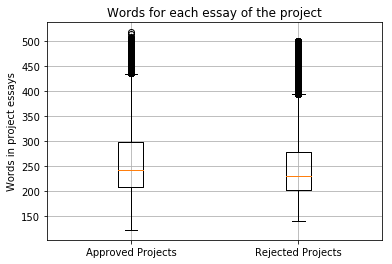

In [38]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_word_count, rejected_word_count])
plt.title('Words for each essay of the project')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project essays')
plt.grid()
plt.show()

**1. Distribution for no. of words in project essay for approved projects is more spread than the distribution for no. of words in project essays for rejected projects. Since whiskers of approved project are more stretched than the whiskers of rejected project. Here whishkers are Q1 - 1.5\*IQR and Q3 + 1.5\*IQR.<br>**
**2. Median for approved project(242 words) is more than median for rejected projects(229 words).**

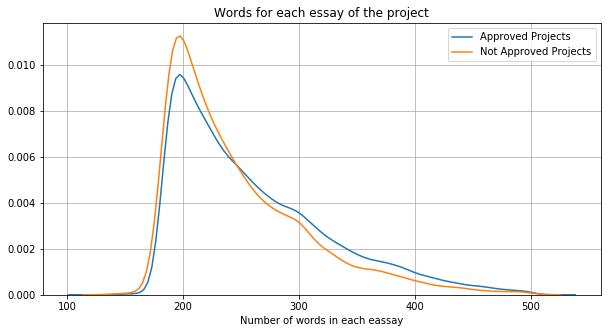

In [39]:
plt.figure(figsize=(10,5))
sns.distplot(approved_word_count, hist= False, label='Approved Projects')
sns.distplot(rejected_word_count, hist=False, label="Not Approved Projects")
plt.title('Words for each essay of the project')
plt.xlabel('Number of words in each eassay')
plt.grid()
plt.legend()
plt.show()

__1. For approved projects, distribution for number of words in each essay is slightly ahead of the distribution for rejected projects.<br>__
__2. At value around 200 i.e essay which contains 200 words approximately occur more oftenly in rejected projects. And essay which contains 200 words approximately occur slightly less often times in approved projects. This can be concluded by looking at the peak value of both the distribution plot.__

### 1.2.8 Univariate Analysis: Cost per project

In [40]:
# we get the cost of the project using resource.csv file
resource_data.head(2)

id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

In [41]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)

id   price  quantity
0  p000001  459.56         7
1  p000002  515.89        21

In [42]:
# join two dataframes in python: 
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [43]:
approved_price = project_data[project_data['project_is_approved']==1]['price'].values

rejected_price = project_data[project_data['project_is_approved']==0]['price'].values

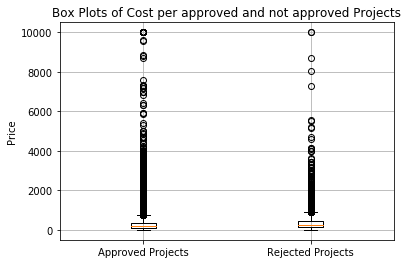

In [44]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_price, rejected_price])
plt.title('Box Plots of Cost per approved and not approved Projects')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Price')
plt.grid()
plt.show()

From the boxplot we cannot make much sense of the distribution of cost for approved and rejected projects, as the distribution seems very similar.

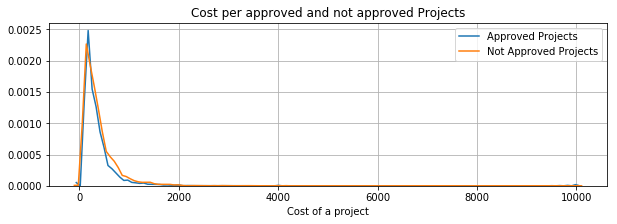

In [45]:
plt.figure(figsize=(10,3))
sns.distplot(approved_price, hist=False, label="Approved Projects")
sns.distplot(rejected_price, hist=False, label="Not Approved Projects")
plt.title('Cost per approved and not approved Projects')
plt.xlabel('Cost of a project')
plt.grid()
plt.legend()
plt.show()

**Distribution plot of cost for both approved and reject projects are very highly overlapping, hence cannot make much sense from this plot. Both this PDF are rightly skewed. <br>
When cost is arount \$1000 pdf of rejectd preject is slightly ahead of approved project. But again fromthis we cannot conclude anything about the cost of approved and not approved project.**

In [46]:
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()
x.field_names = ["Percentile", "Approved Projects", "Not Approved Projects"]

for i in range(0,101,5):
    x.add_row([i,np.round(np.percentile(approved_price,i), 3), np.round(np.percentile(rejected_price,i), 3)])
print(x)

+------------+-------------------+-----------------------+
| Percentile | Approved Projects | Not Approved Projects |
+------------+-------------------+-----------------------+
|     0      |        0.66       |          1.97         |
|     5      |       13.59       |          41.9         |
|     10     |       33.88       |         73.67         |
|     15     |        58.0       |         99.109        |
|     20     |       77.38       |         118.56        |
|     25     |       99.95       |        140.892        |
|     30     |       116.68      |         162.23        |
|     35     |      137.232      |        184.014        |
|     40     |       157.0       |        208.632        |
|     45     |      178.265      |        235.106        |
|     50     |       198.99      |        263.145        |
|     55     |       223.99      |         292.61        |
|     60     |       255.63      |        325.144        |
|     65     |      285.412      |         362.39       

**By looking at the distribution of cost for approved and not approved projects, we cannot conclude any useful difference. Hence for further exploration we printed percentile values using pretty table. <br>
We observed that from 0th to 95th percentile(with step of 5), respective cost for rejected projects is more than the respective cost for approved projects.**

<h3><font color='red'>1.2.9 Univariate Analysis: teacher_number_of_previously_posted_projects</font></h3>

In [47]:
teacher_ppp_approval= project_data[project_data.project_is_approved == 1]['teacher_number_of_previously_posted_projects'].values
teacher_ppp_rejected= project_data[project_data.project_is_approved == 0]['teacher_number_of_previously_posted_projects'].values

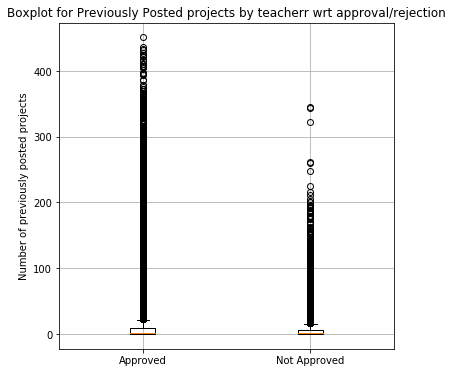

In [48]:
plt.figure(figsize=(6,6))
plt.boxplot([teacher_ppp_approval,teacher_ppp_rejected])
plt.xticks([1,2],['Approved','Not Approved'])
plt.title('Boxplot for Previously Posted projects by teacherr wrt approval/rejection')
plt.ylabel('Number of previously posted projects')
plt.grid()
plt.show()

**Above boxplot is cluttered a lot, IQR range is also not clear from above boxplot.<br> One point that we can note down here is that in case of approved projects, *more* number of teacher_previously_posted_projects lying outside IQR range as compared to rejected projects.**

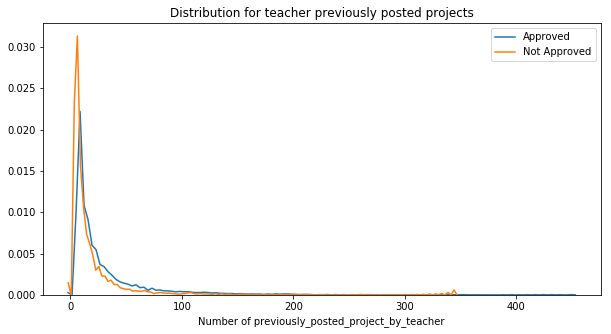

In [49]:
plt.figure(figsize=(10,5))
sns.distplot(teacher_ppp_approval, hist=False,label='Approved')
sns.distplot(teacher_ppp_rejected, hist=False, label='Not Approved')
plt.title('Distribution for teacher previously posted projects')
plt.xlabel('Number of previously_posted_project_by_teacher')
plt.show()

**1. Distribution of rejected project wrt teacher_previously_posted_projects is slightly behind the accepted project distribution.<br><br>2. It seems like if number of previously posted project is more by teacher its acceptance rate increases, because from past experience of rejected project help teachers to post suitable project which has high chance of acceptance.**

<h3><font color='red'>1.2.10 Univariate Analysis: project_resource_summary</font></h3>

In [50]:
#To extract digit from text: https://stackoverflow.com/a/37683738/8107740
project_data['digit_present'] = project_data['project_resource_summary'].str.extract('(\d+)')

In [51]:
#Counting how many project resource summary contains digit
s = project_data['digit_present'].notnull().sum()
print('Number of projects that contains digit in there project_resource_summary: ',s)
print('only {}% of project proposal resource summary has digits in it'.format(np.round(s*100/project_data.shape[0],3)))

Number of projects that contains digit in there project_resource_summary:  15756
only 14.422% of project proposal resource summary has digits in it


In [52]:
#Creating dataframe which tells us what percent of project is approved or rejected if it contains digit in there project_resource_summary
a = project_data.groupby('project_is_approved').agg({'digit_present':'count'}).reset_index()
a['%_of_approval'] = a['digit_present']/s
print(a)

   project_is_approved  digit_present  %_of_approval
0                    0           1666       0.105737
1                    1          14090       0.894263


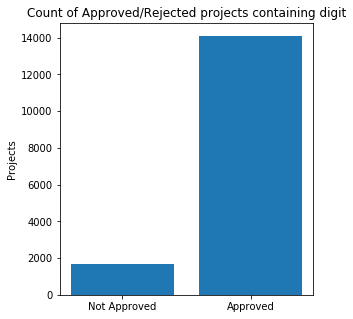

In [53]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.bar(a['project_is_approved'],a['digit_present'])
plt.xticks([0,1],['Not Approved','Approved'])
plt.title('Count of Approved/Rejected projects containing digit')
plt.ylabel('Projects')
plt.show()

**Observation:**
1. Only 14.42% i.e 15756 projects submitted which contains number in there project_resource_summary.
2. Out of this 15756 project, 14090(89.42%) of project got accepted whereas only few(1666 which is 10.57%) project got rejected.
3. By looking at the huge difference in acceptance rate for projects which contain numbers in there project_resource_summary we can say that including number of resource requried in resource summary increases project acceptance chance. *But one more point that we cannot neglect here is that among 109248 project proposal only 14.42% contain digits in there project_resource_summary. Hence just by looking at 14% of data we cannot make any assumption for whole dataset(project_data).*

**We analysed projects which contain number in there project_resource_summary. Let's see how project_resource_summary if not contain digits in it affects project acceptance rate.**

In [54]:
s = project_data['digit_present'].isnull().sum()
print('Number of projects that doesn\'t contains digit in there project_resource_summary: ',s)
print('Only {}% of project proposal resource summary does\'nt have digits in it'.format(np.round(s*100/project_data.shape[0],3)))

Number of projects that doesn't contains digit in there project_resource_summary:  93492
Only 85.578% of project proposal resource summary does'nt have digits in it


In [55]:
#Replacing nan with -1 : https://stackoverflow.com/a/44559011/8107740
project_data['digit_present'].replace(np.nan, -1, inplace = True)

In [56]:
# Count number of -1 in dataframe python: https://stackoverflow.com/a/51540521/4084039
b = project_data.groupby('project_is_approved').agg({'digit_present':lambda x: x.eq(-1).sum()}).reset_index()
b['%_of_approval'] = b['digit_present']/s

#Changing specific column name: https://stackoverflow.com/a/34192820/8107740
b.columns.values[1] = 'digit_not_present'
print(b)

   project_is_approved  digit_not_present  %_of_approval
0                    0              14876       0.159115
1                    1              78616       0.840885


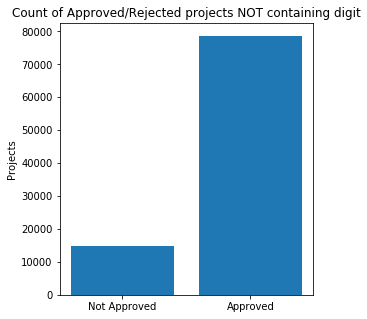

In [57]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.bar(b['project_is_approved'],b['digit_not_present'])
plt.xticks([0,1],['Not Approved','Approved'])
plt.title('Count of Approved/Rejected projects NOT containing digit')
plt.ylabel('Projects')
plt.show()

**Observation**:
1. 85.57% of the total projects doesn't contain digits in there project_report_summary.
2. Among these projects(not containing digit in resource summary), 84.08% projects got approved whereas 15.91% got rejected.

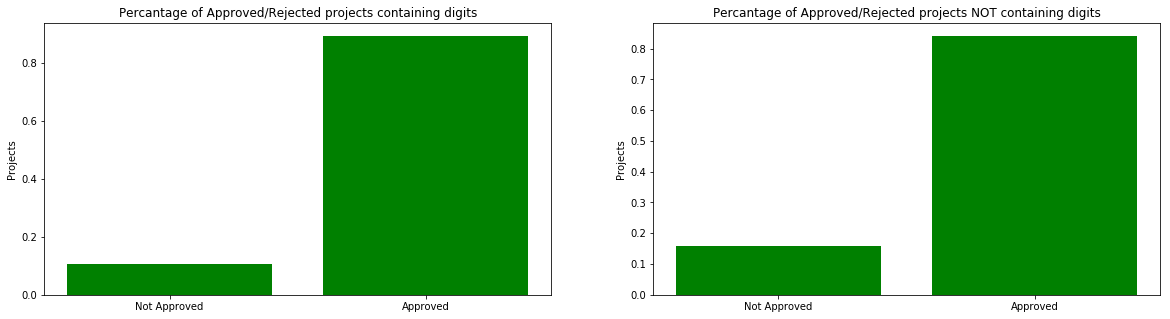

In [58]:
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.bar(a['project_is_approved'],a['%_of_approval'],color = 'green')
plt.xticks([0,1],['Not Approved','Approved'])
plt.title('Percantage of Approved/Rejected projects containing digits')
plt.ylabel('Projects')

plt.subplot(122)
plt.bar(b['project_is_approved'],b['%_of_approval'],color = 'green')
plt.xticks([0,1],['Not Approved','Approved'])
plt.title('Percantage of Approved/Rejected projects NOT containing digits')
plt.ylabel('Projects')
plt.show()

**Form the above bar plot, it is clear that project containing digit and project not containing digit in there project_resource_summary both have approximately same acceptance rate. <br>
It doesn't seems like presence of digit in project_resource_summary have any affect on project acceptance rate.**

### Univariate analysis: Quantity

In [59]:
quantity_approved = project_data[project_data['project_is_approved']==1]['quantity'].values
quantity_rejected = project_data[project_data['project_is_approved']==0]['quantity'].values

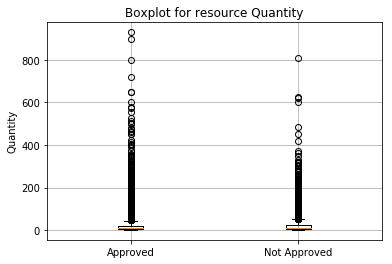

In [60]:
plt.boxplot([quantity_approved,quantity_rejected])
plt.xticks([1,2],['Approved','Not Approved'])
plt.title('Boxplot for resource Quantity')
plt.ylabel('Quantity')
plt.grid()
plt.show()

Boxplot for quantities of resources required with respect to project approval and rejection is uninterpretable. Both looks very similar except that in approved project more number of points are found above the whiskers.

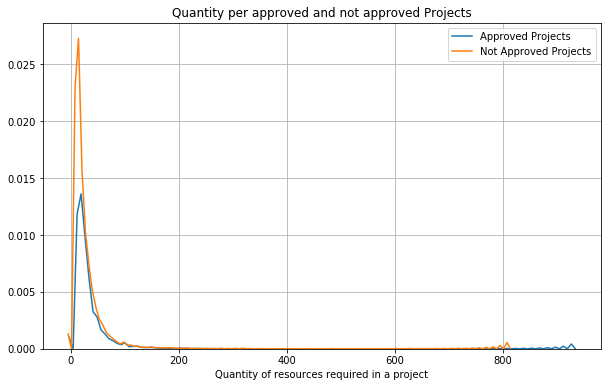

In [61]:
plt.figure(figsize=(10,6))
sns.distplot(quantity_approved, hist=False, label="Approved Projects")
sns.distplot(quantity_rejected, hist=False, label="Not Approved Projects")
plt.title('Quantity per approved and not approved Projects')
plt.xlabel('Quantity of resources required in a project')
plt.grid()
plt.legend()
plt.show()

**Distribution of quantities for approved projects has right skewness more than rejected projects.<br>
More number of rejected projects required quantity of resources in range of 0 to 100 as compared to approved project.**

## 1.3 Text preprocessing

### 1.3.1 Essay Text

In [62]:
project_data.head(2)


Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2      ...        \
0  \"The limits of your language are the limits o...      ...         
1  The projector we need for our school is very c...      ...         

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

  teacher_number_of_previously_posted_projects  project_is_approved  \
0                                            0                    0   
1                                            7                    1   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  price  quantity  \
0  My students are English learners that are work...  154.6        23   
1  Our students arrive to our school eager to lea...  299.0         1   

   digit_present  
0             -1  
1             -1  

[2 rows x 21 columns]

In [63]:
# printing some random essays.
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)


My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect. \"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are a

In [64]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub('nan','',phrase) #Removing nan from each essay.
    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [65]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore. Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playin

In [66]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore. Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phy

In [67]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [68]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
#https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
stopwords.remove('not')
stopwords.remove('no')
stopwords.remove('nor')

In [69]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 109248/109248 [02:11<00:00, 831.14it/s]


In [70]:
# after preprocesing
preprocessed_essays[20000]

'my kindergarten students varied disabilities ranging speech language delays cognitive delays gross fine motor delays autism they eager beavers always strive work hardest working past limitations the materials ones i seek students i teach title i school students receive free reduced price lunch despite disabilities limitations students love coming school come eager learn explore have ever felt like ants pants needed groove move meeting this kids feel time the want able move learn say wobble chairs answer i love develop core enhances gross motor turn fine motor skills they also want learn games kids not want sit worksheets they want learn count jumping playing physical engagement key success the number toss color shape mats make happen my students forget work fun 6 year old deserves'

<h3><font color='red'>1.3.2 Project title Text</font></h3>

In [71]:
print(project_data['project_title'].values[9])
print(project_data['project_title'].values[29877])
print(project_data['project_title'].values[8607])

Just For the Love of Reading--\r\nPure Pleasure
Military First Graders Need Kindles for eBooks and Math Fun!
Make Your Mark


In [72]:
preprocessed_title = []
for title in tqdm(project_data['project_title'].values):
    title = decontracted(title)
    title = title.replace('\\r', ' ')
    title = title.replace('\\"', ' ')
    title = title.replace('\\n', ' ')
    title = re.sub('[^A-Za-z0-9]+', ' ', title)
    title = ' '.join(e for e in title.split() if e not in stopwords)
    preprocessed_title.append(title.lower().strip())

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:05<00:00, 18342.01it/s]


In [73]:
#after preprocessing title
preprocessed_title[29877]

'military first graders need kindles ebooks math fun'

## 1. 4 Preparing data for models

In [74]:
project_data.drop(['digit_present'], axis = 1, inplace = True)

In [75]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price',
       'quantity'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data
       
       - quantity : numerical
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.4.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [76]:
# we use count vectorizer to convert the values into one hot encoded features
def one_hot(cat_feature, vocab = None):
    ''' Function to convert categorical feature to numerical 
        features.
        parameter given:
        --> vocab = list of strings given as vocabulary
        --> cat_feature = Categorical feature that has to be converted.
    '''
    from sklearn.feature_extraction.text import CountVectorizer
    vectorizer = CountVectorizer(vocabulary= vocab, lowercase= False , binary=True)
    vectorizer.fit(cat_feature)
    feature = vectorizer.get_feature_names()
    encoding = vectorizer.transform(cat_feature)
    return feature, encoding

In [77]:
#Convering clean categories to numerical features
feature, categories_one_hot = one_hot(project_data['clean_categories'].values,list(sorted_cat_dict.keys())) 
print(feature)
print('Shape of matrix after one hot encoding', categories_one_hot.shape)
#Considering only 10000 rows to overcome memory issue later while merging
categories_one_hot = categories_one_hot[:10000] 
print('Shape of new matrix', categories_one_hot.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encoding (109248, 9)
Shape of new matrix (10000, 9)


In [78]:
#Convering clean sub categories to numerical features
feature, sub_categories_one_hot = one_hot(project_data['clean_subcategories'].values,list(sorted_sub_cat_dict.keys())) 
print(feature)
print('Shape of matrix after one hot encoding', sub_categories_one_hot.shape)
#Considering only 10000 rows to overcome memory issue later while merging
sub_categories_one_hot = sub_categories_one_hot[:10000] 
print('Shape of new matrix', sub_categories_one_hot.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encoding (109248, 30)
Shape of new matrix (10000, 30)


In [79]:
#Convering school_state to numerical features
feature, school_state_one_hot = one_hot(project_data['school_state'].values) 
print(feature)
print(school_state_one_hot.shape)
#Considering only 10000 rows to overcome memory issue later while merging
school_state_one_hot = school_state_one_hot[:10000] 
print('Shape of new matrix', school_state_one_hot.shape)

['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']
(109248, 51)
Shape of new matrix (10000, 51)


In [80]:
project_data['teacher_prefix'].isnull().sum() #Presence of null value in teacher_prefix column

3

There is 3 missing value in teacher_prefix column. We will impute it with most frequently occuring values in that respective column.

In [81]:
#https://www.geeksforgeeks.org/python-pandas-dataframe-fillna-to-replace-null-values-in-dataframe/
project_data['teacher_prefix'].fillna(project_data['teacher_prefix'].mode()[0],inplace = True)
project_data['teacher_prefix'].isnull().sum()

0

In [82]:
#Convering teacher prefix to numerical features
feature, teacher_prefix_one_hot = one_hot(project_data['teacher_prefix'].values) 
print(feature)
print(teacher_prefix_one_hot.shape)
#Considering only 10000 rows to overcome memory issue later while merging
teacher_prefix_one_hot = teacher_prefix_one_hot[:10000] 
print('Shape of new matrix', teacher_prefix_one_hot.shape)

['Dr', 'Mr', 'Mrs', 'Ms', 'Teacher']
(109248, 5)
Shape of new matrix (10000, 5)


In [83]:
#Converting project_grade_category to numerical feature
#We use OneHotEncoder here because Countvectorizer ignore words which has punctution mark in it.
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe.fit(project_data[['project_grade_category']])
grade_one_hot = ohe.transform(project_data[['project_grade_category']])
print(ohe.get_feature_names())
print('Shape of matrix after one hot encoding', grade_one_hot.shape)
grade_one_hot = grade_one_hot[:10000] 
print('Shape of new matrix', grade_one_hot.shape)

['x0_Grades 3-5' 'x0_Grades 6-8' 'x0_Grades 9-12' 'x0_Grades PreK-2']
Shape of matrix after one hot encoding (109248, 4)
Shape of new matrix (10000, 4)


### 1.4.2 Vectorizing Text data

#### 1.4.2.1 Bag of words

In [84]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df = 10)
essay_bow = vectorizer.fit_transform(preprocessed_essays) # Vectorizing project essay.
print('Shape of matrix: ',essay_bow.shape)
essay_bow = essay_bow[:10000] 
print('Shape of new matrix', essay_bow.shape)

Shape of matrix:  (109248, 16619)
Shape of new matrix (10000, 16619)


<h4><font color='red'> 1.4.2.2 Bag of Words on `project_title`</font></h4>

In [85]:
# We are considering only those words which appeared in at least 5 documents or project title
vectorizer = CountVectorizer(min_df=5)
title_bow = vectorizer.fit_transform(preprocessed_title) #Vectorizing project title
print('Shape of matrix: ', title_bow.shape)
title_bow = title_bow[:10000] 
print('Shape of new matrix', title_bow.shape)

Shape of matrix:  (109248, 5107)
Shape of new matrix (10000, 5107)


#### 1.4.2.3 TFIDF vectorizer

In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
essay_tfidf = vectorizer.fit_transform(preprocessed_essays)
print('Shape of matrix: ', essay_tfidf.shape)
essay_tfidf = essay_tfidf[:10000] 
print('Shape of new matrix', essay_tfidf.shape)

Shape of matrix:  (109248, 16619)
Shape of new matrix (10000, 16619)


<h4><font color='red'> 1.4.2.4 TFIDF Vectorizer on `project_title`</font></h4>

In [87]:
vectorizer = TfidfVectorizer(min_df=5)
title_tfidf = vectorizer.fit_transform(preprocessed_title)
print('Shape of matrix: ', title_tfidf.shape)
title_tfidf = title_tfidf[:10000] 
print('Shape of new matrix', title_tfidf.shape)

Shape of matrix:  (109248, 5107)
Shape of new matrix (10000, 5107)


#### 1.4.2.5 Using Pretrained Models: Avg W2V

In [88]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [89]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
path = 'C:/Users/PURNIMA/Documents/AI/Donors choose/glove_vectors'
with open(path, 'rb') as f:
    model = pickle.load(f)
    glove_words = set(model.keys())

In [90]:
#Computing average w2v for each  review
essay_avgw2v = [] #avgw2v for each sentence will be stored in this list

for sent in tqdm(preprocessed_essays):
    vector = np.zeros(300)    #vector with all elements zero to store avgw2v vector for each essay
    count_words = 0           #counting no. of words in each essay
    for word in sent.split():
        if word in glove_words:
            vector += model[word]
            count_words +=1
    if count_words != 0 :
        vector /=count_words
    essay_avgw2v.append(vector)
        
print('Length of essay_avgw2v list: ', len(essay_avgw2v))
print('Length of each elemnt in essay_avgw2v list: ', len(essay_avgw2v[98]))       
essay_avgw2v = essay_avgw2v[:10000] 
print('New lenght of list', len(essay_avgw2v))

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [01:01<00:00, 1788.84it/s]


Length of essay_avgw2v list:  109248
Length of each elemnt in essay_avgw2v list:  300
New lenght of list 10000


<h4><font color='red'> 1.4.2.6 Using Pretrained Models: AVG W2V on `project_title`</font></h4>

In [91]:
#Computing average w2v for each  title
title_avgw2v = []   #avgw2v for each sentence will be stored in this list
for sent in tqdm(preprocessed_title):
    vector = np.zeros(300)     #vector with all elements zero to store avgw2v vector for each title
    count_words = 0            #counting no. of words in each title
    for word in sent.split():
        if word in glove_words:
            vector += model[word]
            count_words +=1
    if count_words != 0:
        vector /= count_words
    title_avgw2v.append(vector)
    
print('Length of title_avgw2v list: ', len(title_avgw2v))
print('Length of each elemnt in title_avgw2v list: ', len(title_avgw2v[8765]))  
title_avgw2v = title_avgw2v[:10000] 
print('New lenght of list', len(title_avgw2v))

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:02<00:00, 37284.03it/s]


Length of title_avgw2v list:  109248
Length of each elemnt in title_avgw2v list:  300
New lenght of list 10000


#### 1.4.2.7 Using Pretrained Models: TFIDF weighted W2V

In [92]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays)
# Creating dictionary where each word in eassay is key and its corresponding idf value is value.
dictnary = dict(zip(tfidf_model.get_feature_names(),list(tfidf_model.idf_)))
tfidf_word = set(tfidf_model.get_feature_names())

In [93]:
#Calculating tfidf weighted w2v for each essay
essay_tfidfw2v = []

for sent in tqdm(preprocessed_essays):
    vector = np.zeros(300)
    sum_weight = 0
    for word in sent.split():
        if (word in glove_words) and (word in tfidf_word):
            tf_idf = (sent.count(word)/len(sent.split()))*dictnary[word] # getting the tfidf value for each word
            vector += (model[word]*tf_idf) # calculating tfidf weighted w2v
            sum_weight += tf_idf
    if sum_weight !=0:
        vector /= sum_weight
    essay_tfidfw2v.append(vector)

print('Length of essay_tfidfw2v list: ', len(essay_tfidfw2v))
print('Length of each elemnt in essay_tfidfw2v list: ', len(essay_tfidfw2v[348]))      
essay_tfidfw2v = essay_tfidfw2v[:10000] 
print('New lenght of list', len(essay_tfidfw2v))

100%|█████████████████████████████████████████████████████████████████████████| 109248/109248 [07:42<00:00, 236.37it/s]


Length of essay_tfidfw2v list:  109248
Length of each elemnt in essay_tfidfw2v list:  300
New lenght of list 10000


<h4><font color='red'> 1.4.2.9 Using Pretrained Models: TFIDF weighted W2V on `project_title`</font></h4>

In [94]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_title)
# Creating dictionary where each word in title is key and its corresponding idf value is value.
dictionary = dict(zip(tfidf_model.get_feature_names(),list(tfidf_model.idf_)))
tfidf_word = set(tfidf_model.get_feature_names())

In [95]:
#Calculating tfidf weighted w2v for each title
title_tfidfw2v = []

for sent in tqdm(preprocessed_title):
    vector = np.zeros(300)
    sum_weight = 0
    for word in sent.split():
        if (word in glove_words) and (word in tfidf_word):
            tf_idf = (sent.count(word)/len(sent.split()))*dictionary[word] # getting the tfidf value for each word
            vector += (model[word]*tf_idf) # calculating tfidf weighted w2v
            sum_weight += tf_idf
    if sum_weight !=0:
        vector /= sum_weight
    title_tfidfw2v.append(vector)

print('Length of title_tfidfw2v list: ', len(title_tfidfw2v))
print('Length of each elemnt in title_tfidfw2v list: ', len(title_tfidfw2v[954]))      
title_tfidfw2v = title_tfidfw2v[:10000] 
print('New lenght of list', len(title_tfidfw2v))

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:05<00:00, 19437.32it/s]


Length of title_tfidfw2v list:  109248
Length of each elemnt in title_tfidfw2v list:  300
New lenght of list 10000


### 1.4.3 Vectorizing Numerical features

In [96]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(project_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized = price_scalar.transform(project_data['price'].values.reshape(-1, 1))

Mean : 298.1193425966608, Standard deviation : 367.49634838483496


In [97]:
price_standardized = price_standardized[0:10000]

In [98]:
#Standardizing teacher_previously_posted_project
scaler = StandardScaler()
scaler.fit(project_data['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
print(f'Mean : {scaler.mean_[0]}, Standard deviation : {np.sqrt(scaler.var_[0])}')
previous_project = scaler.transform(project_data['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

c:\users\purnima\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



Mean : 11.153165275336848, Standard deviation : 27.77702641477403


c:\users\purnima\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



In [99]:
previous_project = previous_project[0:10000]

### 1.4.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [100]:
print(categories_one_hot.shape)
print(sub_categories_one_hot.shape)
print(teacher_prefix_one_hot.shape)
print(grade_one_hot.shape)
print(school_state_one_hot.shape)
print(essay_bow.shape)
print(title_bow.shape)

(10000, 9)
(10000, 30)
(10000, 5)
(10000, 4)
(10000, 51)
(10000, 16619)
(10000, 5107)


In [101]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X = hstack((categories_one_hot, sub_categories_one_hot, essay_bow, price_standardized))
X.shape

(10000, 16659)

In [102]:
quantity = project_data['quantity'].values[0:10000]
print(quantity.shape)

(10000,)


In [103]:
quantity = quantity.reshape(-1,1)
label = project_data.project_is_approved.values[0:10000]
label.shape

(10000,)

__Since merging all feature with 109248 rows and then converting it to dense array gives memory error. Hence I considerd 10k points.__

<h1><font color='red'>Assignment 2: Apply TSNE<font></h1>

 <font color=#F4274F>If you are using any code snippet from the internet, you have to provide the reference/citations, as we did in the above cells. Otherwise, it will be treated as plagiarism without citations.</font>

<ol> 
    <li> In the above cells we have plotted and analyzed many features. Please observe the plots and write the observations in markdown cells below every plot.</li>
    <li> EDA: Please complete the analysis of the feature: teacher_number_of_previously_posted_projects</li>
    <li>
        <ul>Build the data matrix using these features 
            <li>school_state : categorical data (one hot encoding)</li>
            <li>clean_categories : categorical data (one hot encoding)</li>
            <li>clean_subcategories : categorical data (one hot encoding)</li>
            <li>teacher_prefix : categorical data (one hot encoding)</li>
            <li>project_title : text data (BOW, TFIDF, AVG W2V, TFIDF W2V)</li>
            <li>price : numerical</li>
            <li>teacher_number_of_previously_posted_projects : numerical</li>
         </ul>
    </li>
    <li> Now, plot FOUR t-SNE plots with each of these feature sets.
        <ol>
            <li>categorical, numerical features + project_title(BOW)</li>
            <li>categorical, numerical features + project_title(TFIDF)</li>
            <li>categorical, numerical features + project_title(AVG W2V)</li>
            <li>categorical, numerical features + project_title(TFIDF W2V)</li>
        </ol>
    </li>
    <li> Concatenate all the features and Apply TNSE on the final data matrix </li>
    <li> <font color='blue'>Note 1: The TSNE accepts only dense matrices</font></li>
    <li> <font color='blue'>Note 2: Consider only 5k to 6k data points to avoid memory issues. If you run into memory error issues, reduce the number of data points but clearly state the number of datat-poins you are using</font></li>
</ol>

<h2> 2.1 TSNE with `BOW` encoding of `project_title` feature </h2>

In [104]:
#Merging required features.
X_bow = hstack((school_state_one_hot,categories_one_hot, sub_categories_one_hot, grade_one_hot, teacher_prefix_one_hot,
               quantity, previous_project, price_standardized,
               title_bow))
X_bow = X_bow.toarray() #Converting sparse matrix to dense matrix

In [105]:
print('Shape of matrix before applying tsne:', X_bow.shape)

Shape of matrix before applying tsne: (10000, 5209)


In [106]:
from sklearn.manifold import TSNE
t_sne = TSNE(n_components=2, random_state=98) 
tsne_bow = t_sne.fit_transform(X_bow)
print('Shape of matrix after applying TSNE:',tsne_bow.shape )

Shape of matrix after applying TSNE: (10000, 2)


In [107]:
#Merging class label with compressed feature
X_bow = np.vstack((tsne_bow.T,label)).T
print('Final shape:', X_bow.shape)
#Saving it as dataframe
X_bow = pd.DataFrame(X_bow, columns=['Dimension_1','Dimension_2','project_is_approved'])
X_bow.head()

Final shape: (10000, 3)


Dimension_1  Dimension_2  project_is_approved
0    57.583103   -36.142838                  0.0
1     5.592454    44.217926                  1.0
2    43.838821   -32.467262                  0.0
3   -58.045315    -0.195093                  1.0
4   -23.471804     5.356323                  1.0

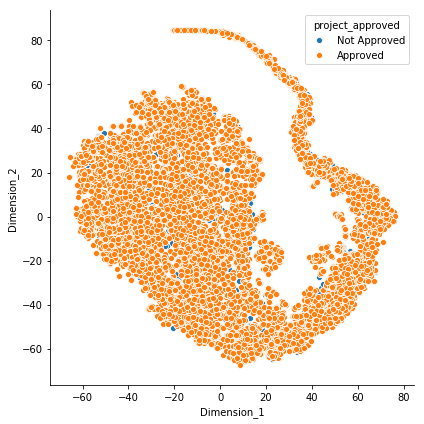

In [108]:
sns.FacetGrid(X_bow,hue='project_is_approved', height = 6).map(sns.scatterplot,'Dimension_1','Dimension_2')
plt.legend(labels= ['Not Approved','Approved'], title = 'project_approved') #https://stackoverflow.com/a/35388083/8107740
plt.show()

**From above plot we get a tailed like cluster/structure for all those projects which are approved. But we cannot say anything about Not approved projects because in the plot there is high overlapping.**

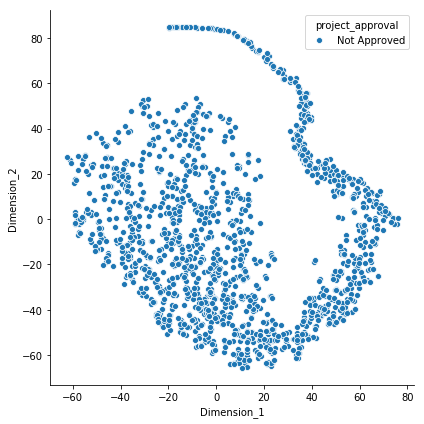

In [111]:
#Plot to look at structure of not approved projects that are hidden behind approved projects
sns.FacetGrid(X_bow[X_bow.project_is_approved==0],hue='project_is_approved', height = 6).map(sns.scatterplot,'Dimension_1','Dimension_2')
plt.legend(labels= ['Not Approved','Approved'], title = 'project_approval') #https://stackoverflow.com/a/35388083/8107740
plt.show()

**T-Sne is capable of retaining local structure of data, and does't bother about global structure. Hence to see the structure of cluster formed by not approved projects we plotted only them. From above plot structure for 'not approved' points are also tailed like.**

<h2> 2.2 TSNE with `TFIDF` encoding of `project_title` feature </h2>

In [112]:
#Merging required features.
X_tfidf = hstack((school_state_one_hot,categories_one_hot, sub_categories_one_hot, grade_one_hot, teacher_prefix_one_hot,
               quantity, previous_project, price_standardized,
               title_tfidf))
X_tfidf = X_tfidf.toarray() #Converting sparse matrix to dense matrix
print('Shape of matrix before applying tsne:', X_tfidf.shape)

Shape of matrix before applying tsne: (10000, 5209)


In [113]:
from sklearn.manifold import TSNE
t_sne = TSNE(n_components=2, random_state=98)
tsne_tfidf = t_sne.fit_transform(X_tfidf)
print('Shape of matrix after applying TSNE:',tsne_tfidf.shape )

Shape of matrix after applying TSNE: (10000, 2)


In [115]:
#Merging class label with compressed feature
X_tfidf = np.vstack((tsne_tfidf.T,label)).T
print('Final shape:', X_tfidf.shape)
#Saving it as dataframe
X_tfidf = pd.DataFrame(X_tfidf, columns=['Dimension_1','Dimension_2','project_is_approved'])
X_tfidf.head()

Final shape: (10000, 3)


Dimension_1  Dimension_2  project_is_approved
0    78.945251   -12.812679                  0.0
1    -0.830446    40.183899                  1.0
2    60.716999   -15.493164                  0.0
3   -73.284027   -30.433453                  1.0
4   -30.889074     7.031857                  1.0

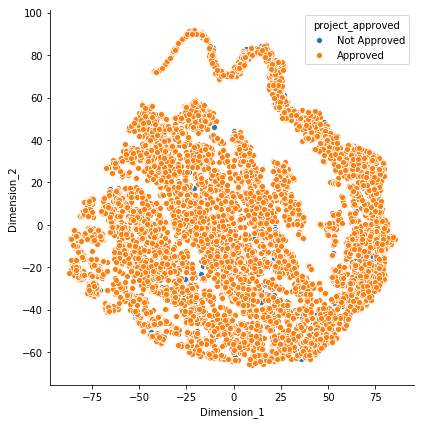

In [117]:
sns.FacetGrid(X_tfidf,hue='project_is_approved', height = 6).map(sns.scatterplot,'Dimension_1','Dimension_2')
plt.legend(labels= ['Not Approved','Approved'], title = 'project_approved') #https://stackoverflow.com/a/35388083/8107740
plt.show()

**Above plot shows more curvy tailed like cluster/structure for all those projects which are approved. Also we cannot say anything about Not approved projects because in the plot there is high overlapping.To know about pattern of not approved projects we will plot it separately**

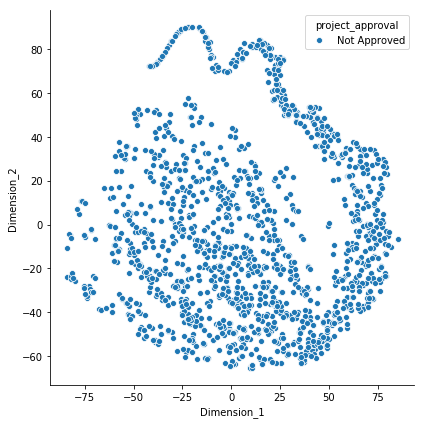

In [118]:
#Plot to look at structure of not approved projects that are hidden behind approved projects
sns.FacetGrid(X_tfidf[X_tfidf.project_is_approved==0],hue='project_is_approved', height = 6).map(sns.scatterplot,'Dimension_1','Dimension_2')
plt.legend(labels= ['Not Approved','Approved'], title = 'project_approval') #https://stackoverflow.com/a/35388083/8107740
plt.show()

**Plot for not approved project shows us the similar tailed like structure which is hidden in the previous plot.**

<h2> 2.3 TSNE with `AVG W2V` encoding of `project_title` feature </h2>

In [119]:
#Merging required features.
X_avgw2v = hstack((school_state_one_hot,categories_one_hot, sub_categories_one_hot, grade_one_hot, teacher_prefix_one_hot,
               quantity, previous_project, price_standardized,
               title_avgw2v))
X_avgw2v = X_avgw2v.toarray() #Converting sparse matrix to dense matrix
print('Shape of matrix before applying tsne:', X_avgw2v.shape)

Shape of matrix before applying tsne: (10000, 402)


In [120]:
t_sne = TSNE(n_components=2, random_state=98)
tsne_avgw2v = t_sne.fit_transform(X_avgw2v)
print('Shape of matrix after applying TSNE:',tsne_avgw2v.shape )

Shape of matrix after applying TSNE: (10000, 2)


In [122]:
#Merging class label with compressed feature
X_avgw2v = np.vstack((tsne_avgw2v.T,label)).T
print('Final shape:', X_avgw2v.shape)
#Saving it as dataframe
X_avgw2v = pd.DataFrame(X_avgw2v, columns=['Dimension_1','Dimension_2','project_is_approved'])
X_avgw2v.head()

Final shape: (10000, 3)


Dimension_1  Dimension_2  project_is_approved
0    65.811508   -11.228289                  0.0
1   -34.587685    35.853935                  1.0
2    64.668938   -16.286182                  0.0
3   -56.706322    -7.489086                  1.0
4   -24.481508   -24.393158                  1.0

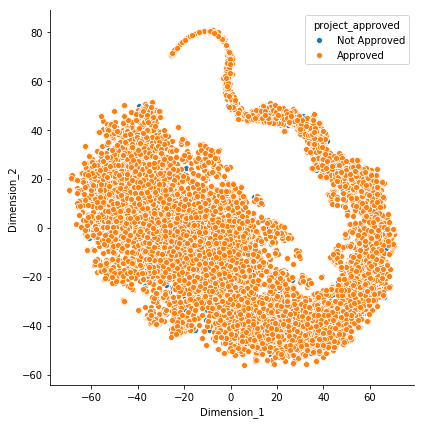

In [123]:
#Plotting .add_legend(labels = ['a','b'])
sns.FacetGrid(X_avgw2v,hue='project_is_approved', height = 6).map(sns.scatterplot,'Dimension_1','Dimension_2')
plt.legend(labels= ['Not Approved','Approved'], title = 'project_approved') #https://stackoverflow.com/a/35388083/8107740
plt.show()

**Above plot looks like a fish having broad head with curled tail. Also the projects belonging to not approved class cannot be seen, because there is high overlap in the plot.**

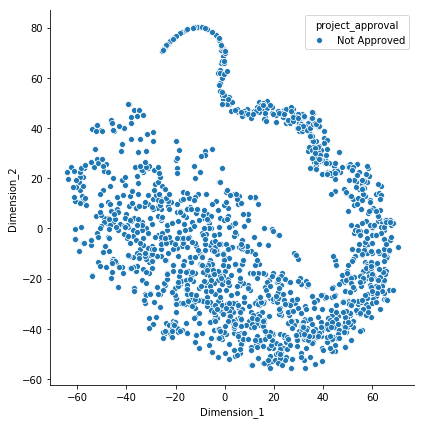

In [124]:
#Plot to look at structure of not approved projects that are hidden behind approved projects
sns.FacetGrid(X_avgw2v[X_avgw2v.project_is_approved==0],hue='project_is_approved', height = 6).map(sns.scatterplot,'Dimension_1','Dimension_2')
plt.legend(labels= ['Not Approved','Approved'], title = 'project_approval') #https://stackoverflow.com/a/35388083/8107740
plt.show()

**In the above plot we have plotted only not approved projects to see its structure. It structure is similar to what we got in the previous plot where we plotted project that is approved and rejected.**

<h2> 2.4 TSNE with `TFIDF Weighted W2V` encoding of `project_title` feature </h2>

In [125]:
#Merging required features.
X_tfidfw2v = hstack((school_state_one_hot,categories_one_hot, sub_categories_one_hot, grade_one_hot, teacher_prefix_one_hot,
               quantity, previous_project, price_standardized,
               title_tfidfw2v))
X_tfidfw2v = X_tfidfw2v.toarray() #Converting sparse matrix to dense matrix
print('Shape of matrix before applying tsne:', X_tfidfw2v.shape)

Shape of matrix before applying tsne: (10000, 402)


In [126]:
from sklearn.manifold import TSNE
t_sne = TSNE(n_components=2, random_state=98)
tsne_tfidfw2v = t_sne.fit_transform(X_tfidfw2v)
print('Shape of matrix after applying TSNE:',tsne_tfidfw2v.shape )

Shape of matrix after applying TSNE: (10000, 2)


In [128]:
#Merging class label with compressed feature
X_tfidfw2v = np.vstack((tsne_tfidfw2v.T,label)).T
print('Final shape:', X_tfidfw2v.shape)
#Saving it as dataframe
X_tfidfw2v = pd.DataFrame(X_tfidfw2v, columns=['Dimension_1','Dimension_2','project_is_approved'])
X_tfidfw2v.head()

Final shape: (10000, 3)


Dimension_1  Dimension_2  project_is_approved
0    63.810093   -23.027239                  0.0
1   -38.726311    45.413414                  1.0
2    50.122360   -19.474979                  0.0
3   -32.120270    -3.848499                  1.0
4   -29.997198     1.597178                  1.0

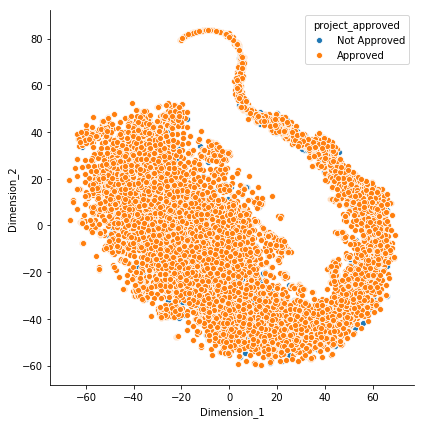

In [129]:
sns.FacetGrid(X_tfidfw2v,hue='project_is_approved', height = 6).map(sns.scatterplot,'Dimension_1','Dimension_2')
#https://stackoverflow.com/a/35388083/8107740
plt.legend(labels= ['Not Approved','Approved'], title = 'project_approved')
plt.show()

**From plot we got a structure of fish with tail which is similar to t-sne plot with AvgW2V.Here also there is huge overlap, hence we cannot conclude anything about the structure of cluster formed by project belonging to not approved class.**

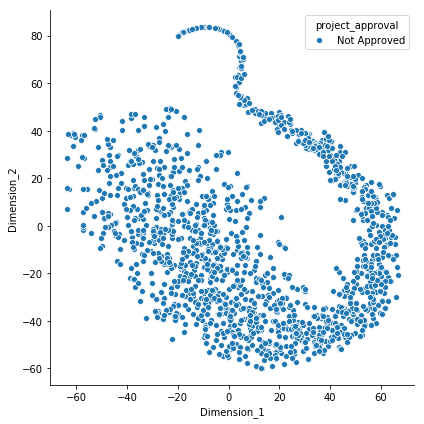

In [132]:
#Plot to look at structure of not approved projects that are hidden behind approved projects
sns.FacetGrid(X_tfidfw2v[X_tfidfw2v.project_is_approved==0],hue='project_is_approved', height = 6).map(sns.scatterplot,'Dimension_1','Dimension_2')
plt.legend(labels= ['Not Approved','Approved'], title = 'project_approval') #https://stackoverflow.com/a/35388083/8107740
plt.show()

**After plotting only projects belonging to 'not approved' class, we can say that it also has a cluster of shape/pattern of a fish with curled tailed.**

## Concatenate all the features and Apply TNSE on the final data matrix

In [133]:
#Created final matrix by only using essay_tfidfw2v and title_tfidfw2v
X_final = hstack((school_state_one_hot,categories_one_hot, sub_categories_one_hot, grade_one_hot, teacher_prefix_one_hot,
               quantity, previous_project, price_standardized,
               essay_tfidfw2, title_tfidfw2v))
X_final = X_final.toarray()
print('Shape of matrix before applying tsne:', X_final.shape)

Shape of matrix before applying tsne: (10000, 702)


In [134]:
t_sne = TSNE(n_components=2, random_state=98)
X_final = t_sne.fit_transform(X_final)
print('Shape of matrix after applying TSNE:',X_final.shape )

Shape of matrix after applying TSNE: (10000, 2)


In [135]:
#Merging class label with compressed feature
X_final = np.vstack((X_final.T,label)).T
print('Final shape:', X_final.shape)
#Saving it as dataframe
X_final = pd.DataFrame(X_final, columns=['Dimension_1','Dimension_2','project_is_approved'])
X_final.head()

Final shape: (10000, 3)


Dimension_1  Dimension_2  project_is_approved
0    55.182735   -31.839378                  0.0
1   -23.659977    52.289074                  1.0
2    40.865047   -26.090290                  0.0
3   -50.361748    14.848237                  1.0
4   -28.302996    11.756774                  1.0

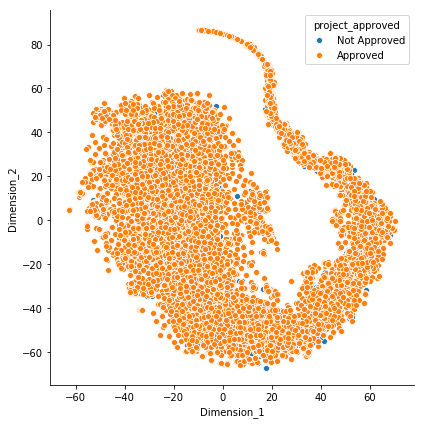

In [136]:
sns.FacetGrid(X_final,hue='project_is_approved', height = 6).map(sns.scatterplot,'Dimension_1','Dimension_2')
plt.legend(labels= ['Not Approved','Approved'], title = 'project_approved') #https://stackoverflow.com/a/35388083/8107740
plt.show()

**After concatenating all features and compressing final matrix using tsne we obtained a plot as shown above. This plot shows a structure which looks like fish having thin tail on top. This plot too has high overlapping, hence cannot say anything about structure of projects belonging to 'not approved' class.**

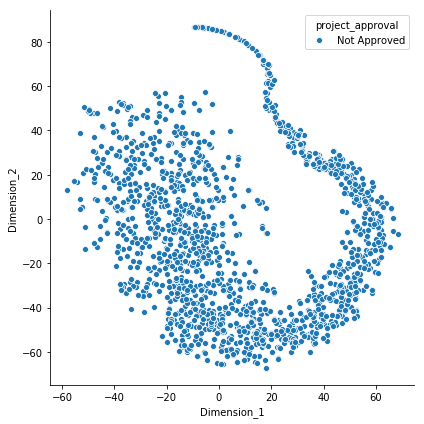

In [138]:
#Plot to look at structure of not approved projects that are hidden behind approved projects
sns.FacetGrid(X_final[X_final.project_is_approved==0],hue='project_is_approved', height = 6).map(sns.scatterplot,'Dimension_1','Dimension_2')
plt.legend(labels= ['Not Approved','Approved'], title = 'project_approval') #https://stackoverflow.com/a/35388083/8107740
plt.show()

**On plotting points belonging to only class of 'not approved' projects, we got a similar structure as we got in our previous plot.**

<h2> 2.5 Summary </h2>

# Write few sentences about the results that you obtained and the observations you made.
1. After observing all t-sne plots,it has fish with thin tailed structure and both classes have huge overlapping. Hence it was difficult to conclude about structure on points belonging to not approved class.
2. Since we know that t-sne has a property of retaining/maintaining it local structure. So we plotted only those points which belong to 'not approved' class in a separate plot and found that these point too have similar fish/dolphin like structure.
3. Also both classes forming a good cluster(with little weired structure) and overlapping completely, but we cann't say that this two classes cannot be separated because t-sne is not capable of retaining global structure. Hence we cannot say anything about the distance between two clusters. 